# Brain MRI Segmentation

Celem projektu jest zaprojektowanie sieci neuronowej rozwiązującej problem segmentacji obrazów mózgu człowieka wykonanych metodą rezonansu magnetycznego.

Na 3929 zdjęć w zbiorze danych składa się 1373 obrazów przedstawiających MRI mózgu zaatakowanego przez nowotwór oraz 2556 zdjęć zdrowego mózgu. Pochodzą one z The Cancer Imaging Archive (TCIA) i odpowiadają 110 pacjentom amerykańskich szpitali, chorującym na glejaka o złośliwości II i III stopnia.

Obrazy są zapisane w formacie TIFF. Do każdego zdjęcia mózgu, dołączona jest maska binarna z ręcznie zaznaczonym obszarem chorobowym, na podstawie nieprawidłowości w sekwencji FLAIR, w której obszary gromadzące w sobie wodę są ukazywane w jaśniejszych barwach.

In [18]:
import os

import tensorflow as tf

from utils.nn import dice_coef, dice_coef_loss, iou
from utils.dataset import prepare_dataset
from dataloader import DatasetLoaderGen

Poniżej przedstawiono przykładowe zdjęcia, kolejno mózgu zdrowego oraz chorego.

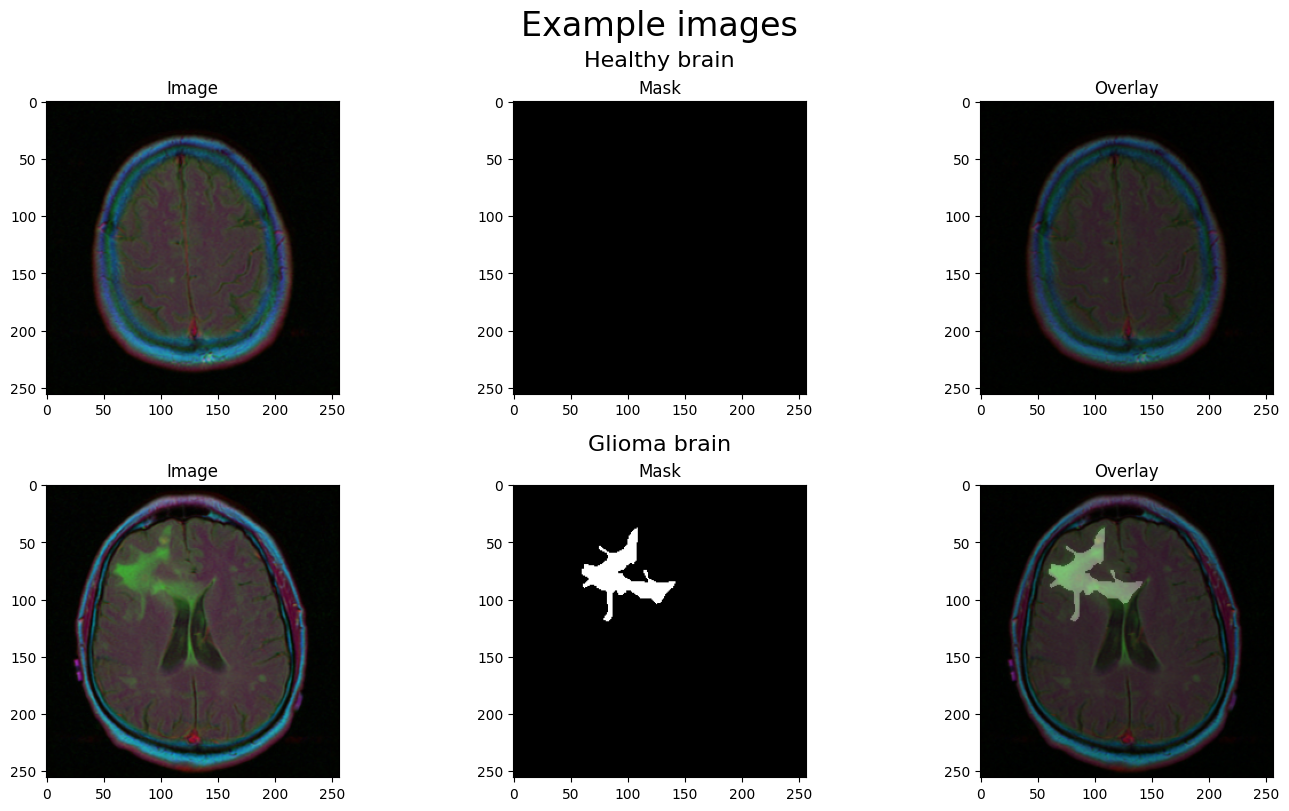

In [142]:
import cv2 as cv
from matplotlib import pyplot as plt

dir = "../dataset/kaggle_3m/TCGA_CS_4941_19960909/"

healthy_image_file = dir + "TCGA_CS_4941_19960909_19.tif"
healthy_mask_file = dir + "TCGA_CS_4941_19960909_19_mask.tif"

tumor_image_file = dir + "TCGA_CS_4941_19960909_15.tif"
tumor_mask_file = dir + "TCGA_CS_4941_19960909_15_mask.tif"

healthy_image = cv.imread(healthy_image_file)
healthy_mask = cv.imread(healthy_mask_file)

tumor_image = cv.imread(tumor_image_file)
tumor_mask = cv.imread(tumor_mask_file)

fig = plt.figure(constrained_layout=True, figsize=(14, 8))
fig.suptitle("Example images", ha="center", fontsize=24, va="top")

subfigs = fig.subfigures(2, 1)

fig1 = subfigs[0]
fig2 = subfigs[1]

healthy_axes = fig1.subplots(1, 3)
tumor_axes = fig2.subplots(1, 3)

fig1.suptitle("Healthy brain", ha="center", fontsize=16, va="top")

healthy_axes[0].title.set_text("Image")
healthy_axes[0].imshow(healthy_image)
healthy_axes[1].title.set_text("Mask")
healthy_axes[1].imshow(healthy_mask)
healthy_axes[2].title.set_text("Overlay")
healthy_axes[2].imshow(healthy_mask)
healthy_axes[2].imshow(healthy_image, alpha=0.7)

fig2.suptitle("Glioma brain", ha="center", fontsize=16, va="top")
tumor_axes[0].title.set_text("Image")
tumor_axes[0].imshow(tumor_image)
tumor_axes[1].title.set_text("Mask")
tumor_axes[1].imshow(tumor_mask)
tumor_axes[2].title.set_text("Overlay")
tumor_axes[2].imshow(tumor_mask)
tumor_axes[2].imshow(tumor_image, alpha=0.7)
plt.show()

In [2]:
MODELS_DIR_PATH = "../models"

def load_model(model_name: str) -> tf.keras.Model:
    return tf.keras.models.load_model(os.path.join(MODELS_DIR_PATH, model_name), custom_objects={'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss, 'iou': iou})

In [3]:
model_0 = load_model("model_0")
model_1 = load_model("model_1")
model_2 = load_model("model_2")

2023-12-31 02:02:37.881359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 02:02:37.898525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-31 02:02:37.898609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
print(model_0)

<function dice_coef_loss at 0x7f1a45141240>
